# Mixture Distribution

In [ ]:
# default_exp mixture

In [ ]:
# export
import numpy as np
import scipy.stats as ss

class Mixture:
    """
    Mixture Distribution
    """
    def __init__(self, components, mixing_proportion):
        """
        Required Arguments:
        - comps : list of scipy style distrubutions : components of the mixture
        - mixing_proportion : np.ndarray : mixture weights
        """
        assert len(components) == len(mixing_proportion), "Number of components must match that implied by the mixing proportions"
        assert np.allclose(mixing_proportion.sum(),1), f"mixing proportions must add up to 1, sum is {mixing_proportion.sum()}"
        self.comps = components
        self.mixProp = mixing_proportion

    def pdf(self, x):
        return np.sum((p * comp.pdf(x) for (comp, p) in zip(self.comps, self.mixProp)), axis=1)

    def cdf(self, x):
        return np.sum((p * comp.cdf(x) for (comp, p) in zip(self.comps, self.mixProp)), axis=1)

    def rvs(self, size):
        sizes = np.cast['int32'](np.floor(size * self.mixProp))
        delta = np.cast['int32'](size - np.sum(sizes))
        ix = np.random.choice(np.size(self.mixProp), size=delta, p=self.mixProp)
        for ii in ix:
            sizes[ii] = sizes[ii] + 1
        dim = np.size(self.comps[0].rvs(size=1))
        x = np.empty([0, dim])
        for (s, comp) in zip(sizes, self.comps):
            rvs = comp.rvs(size=[s, 1])
            if s == 1:
                rvs = np.expand_dims(rvs, axis=0)
            if dim == 1:
                rvs = rvs.reshape((np.size(rvs), 1))
            x = np.concatenate((x, rvs), axis=0)
        return x

    @property
    def mean(self):
        try:
            m = [c.mean() for c in self.comps]
        except TypeError:
            m = [c.mean for c in self.comps]
        return np.dot(self.mixProp,m)

    def rvsCompInfo(self, size):
        sizes = np.cast['int32'](np.floor(size * self.mixProp))
        delta = np.cast['int32'](size - np.sum(sizes))
        ix = np.random.choice(np.size(self.mixProp), size=delta, p=self.mixProp)
        for ii in ix:
            sizes[ii] = sizes[ii] + 1
        dim = np.size(self.comps[0].rvs(size=1))
        x = np.empty([0, dim])
        y = np.empty([0, 1])
        k = 0
        for (s, comp) in zip(sizes, self.comps):
            rvs = comp.rvs(size=[s, 1])
            if s == 1:
                rvs = np.expand_dims(rvs, axis=0)
            if dim == 1:
                rvs = rvs.reshape((np.size(rvs), 1))
            x = np.concatenate((x, rvs), axis=0)
            y = np.concatenate((y, np.zeros([s, 1]) + k), axis=0)
            k = k + 1
        return x, y

    def component_pdfs(self, x):
        return (comp.pdf(x) for comp in self.comps)

In [ ]:
gaussianMixture = Mixture([ss.norm(-5,2),ss.norm(5,2)],np.array([.5,.5]))

In [ ]:
import matplotlib.pyplot as plt

(array([ 5., 12., 15., 15.,  3.,  2.,  6., 23., 13.,  6.]),
 array([-9.11054576, -7.38167665, -5.65280753, -3.92393842, -2.1950693 ,
        -0.46620019,  1.26266893,  2.99153804,  4.72040716,  6.44927627,
         8.17814539]),
 <BarContainer object of 10 artists>)

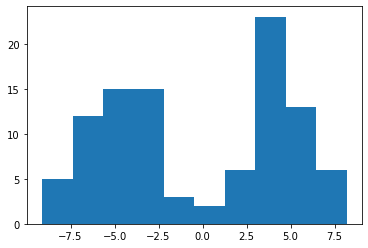

In [ ]:
plt.hist(gaussianMixture.rvs(100))